<a href="https://colab.research.google.com/github/AIME1995/AIME1995/blob/main/K_MEANS%20POUR%20SEGMENTER%20LES%20CLIENTS%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Le modèle ** K-Means Clustering ** (Modèle de deep learning)

## Introduction

Il existe de nombreux modèles de **clustering**.  Malgré sa simplicité, le **K-means** est largement utilisé pour le clustering dans de nombreuses applications de science des données. Il est particulièrement utile si vous avez besoin de découvrir rapidement des informations à partir de **données non étiquetées**. Dans ce cahier, vous apprendrez à utiliser les k-Means pour la segmentation client.

Quelques applications réelles des k-means :

*   Segmentation de la clientèle
* Comprendre ce que les visiteurs d'un site Web tentent d'accomplir
*   La reconnaissance de formes
* Apprentissage automatique
* Compression des données

Nous pratiquons le clustering k-means avec 2 exemples :

* k-means sur un ensemble de données généré aléatoirement
* Utilisation de k-means pour la segmentation client

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [7]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

## k-Means dans randomly génère de base des données
Créeons notre propre base des données:

Nous devons d’abord définir une graine aléatoire. Utilisons la fonction <b>random.seed()</b> de numpy, où la valeur de départ sera définie sur <b>0</b>.

In [11]:
np.random.seed(0)

Ensuite, nous créerons des <i> clusters aléatoires </i> de points en utilisant la classe <b> make_blobs </b>. La classe <b> make_blobs </b> peut accepter de nombreuses entrées, mais nous utiliserons celles-ci spécifiques. <br> <br> <b> <u> input </u> </b>

<ul>
     <li> <b>n_samples</b> : nombre total de points répartis également entre les clusters. </li>
     <ul> <li> La valeur sera : 5000 </li> </ul>
     <li> <b>centers</b> : nombre de centres à générer ou emplacements de centres fixes. </li>
     <ul> <li> La valeur sera : [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
     <li> <b>cluster_std</b> : l'écart type des clusters. </li>
     <ul> <li> La valeur sera : 0,9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
     <li> <b>X</b> : Tableau de formes [n_samples, n_features]. (Matrice des fonctionnalités)</li>
     <ul> <li> Les échantillons générés. </li> </ul>
     <li> <b>y</b> : Tableau de forme [n_samples]. (Vecteur de réponse)</li>
     <ul> <li> Les étiquettes entières pour l’appartenance au cluster de chaque échantillon. </li> </ul>
</ul>

In [12]:
X, y = make_blobs(n_samples=500, centers=[[4,4], [-2, -1],[2, 3], [1, 1]], cluster_std=0.9)

Affichez le nuage de points des données générées aléatoirement.

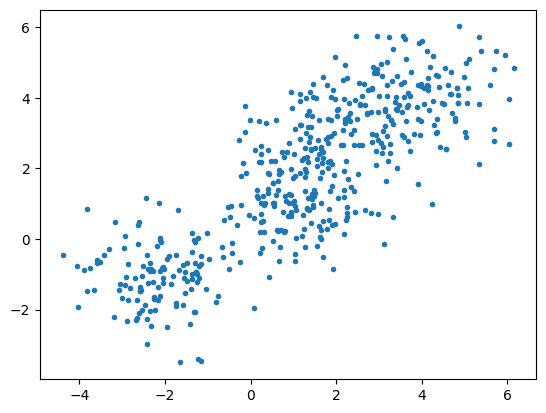

In [13]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

<h2 id="setting_up_K_means">Configuration des K-Means</h2>
Maintenant que nous avons nos données aléatoires, configurons notre clustering K-Means.

La classe KMeans a de nombreux paramètres qui peuvent être utilisés, mais nous utiliserons ces trois :

<ul>
     <li> <b>init</b> : Méthode d'initialisation des centroïdes. </li>
     <ul>
         <li> La valeur sera : "k-means++" </li>
         <li> k-means++ : sélectionne les centres de cluster initiaux pour le clustering k-mean de manière intelligente afin d'accélérer la convergence.</li>
     </ul>
     <li> <b>n_clusters</b> : Le nombre de clusters à former ainsi que le nombre de centroïdes à générer. </li>
     <ul> <li> La valeur sera : 4 (puisque nous avons 4 centres)</li> </ul>
     <li> <b>n_init</b> : nombre de fois où l'algorithme k-means sera exécuté avec différentes valeurs de départ du centroïde. Les résultats finaux seront le meilleur résultat de n_init exécutions consécutives en termes d'inertie. </li>
     <ul> <li> La valeur sera : 12 </li> </ul>
</ul>

Initialisez KMeans avec ces paramètres, où le paramètre de sortie est appelé <b>k_means</b>.

In [14]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means

KMeans(n_clusters=4, n_init=12)

Adaptons maintenant le modèle KMeans à la matrice de fonctionnalités que nous avons créée ci-dessus, <b> X </b>.

In [15]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Récupérons maintenant les étiquettes pour chaque point du modèle à l'aide de l'attribut <b> .labels\_ </b> de KMeans et enregistrons-le sous <b> k_means_labels </b>.

In [16]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 2, 0, 0, 2, 0, 1, 3, 1, 3, 1, 2, 2, 1, 0, 0, 2, 1, 3, 2, 2, 2,
       3, 1, 0, 3, 2, 3, 2, 3, 1, 0, 2, 3, 0, 0, 2, 2, 3, 3, 2, 3, 1, 2,
       1, 3, 2, 0, 0, 3, 3, 2, 1, 0, 2, 1, 0, 0, 0, 1, 3, 0, 2, 2, 3, 0,
       1, 3, 3, 3, 1, 0, 3, 0, 1, 0, 3, 3, 0, 0, 2, 2, 2, 3, 0, 1, 1, 0,
       0, 3, 1, 0, 1, 3, 0, 2, 0, 3, 3, 1, 1, 3, 3, 3, 0, 0, 1, 3, 2, 1,
       3, 3, 2, 3, 0, 3, 3, 2, 0, 0, 2, 0, 3, 0, 0, 3, 3, 1, 3, 0, 1, 2,
       0, 1, 3, 2, 3, 2, 1, 1, 1, 0, 2, 2, 0, 0, 1, 0, 2, 1, 1, 3, 3, 0,
       0, 2, 1, 2, 3, 3, 0, 0, 0, 2, 1, 3, 0, 3, 1, 3, 1, 3, 1, 2, 0, 2,
       3, 2, 2, 2, 1, 2, 1, 1, 2, 1, 3, 0, 0, 1, 0, 3, 3, 1, 2, 3, 3, 3,
       3, 1, 2, 3, 0, 3, 1, 3, 2, 2, 2, 3, 3, 0, 0, 3, 2, 0, 3, 3, 2, 0,
       3, 2, 2, 1, 0, 0, 2, 3, 3, 3, 1, 3, 1, 2, 1, 2, 0, 1, 2, 1, 0, 3,
       2, 3, 3, 0, 3, 1, 0, 3, 2, 2, 1, 2, 0, 2, 3, 0, 3, 0, 1, 1, 1, 2,
       0, 0, 2, 0, 1, 0, 1, 3, 0, 2, 2, 2, 0, 3, 0, 3, 3, 2, 0, 0, 2, 3,
       0, 0, 3, 3, 1, 2, 2, 0, 2, 1, 1, 3, 1, 2, 1,

Nous obtiendrons également les coordonnées des centres du cluster en utilisant les <b> .cluster_centers\_ </b> de KMeans et les enregistrerons sous <b> k_means_cluster_centers </b>.

In [17]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.12983804, -1.07064052],
       [ 1.81481694,  3.06002356],
       [ 4.06038905,  4.0725531 ],
       [ 1.03504745,  0.87564233]])

<h2 id="creating_visual_plot">Création du tracé visuel</h2>

Alors maintenant que nous avons généré les données aléatoires et initialisé le modèle KMeans, traçons-les et voyons à quoi cela ressemble !

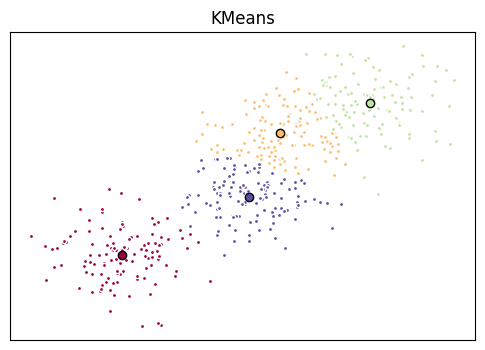

In [21]:
# Initialisez le tracé avec les dimensions spécifiées.
fig = plt.figure(figsize=(6, 4))
# Colors utilise une carte de couleurs, qui produira une gamme de couleurs basée sur
# le nombre d'étiquettes disponibles. Nous utilisons set(k_means_labels) pour obtenir le
# étiquettes uniques.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
#créeons le graphique
ax = fig.add_subplot(1, 1, 1)
# Boucle For qui trace les points de données et les centroïdes.
# k sera compris entre 0 et 3, ce qui correspondra aux clusters possibles que chacun
# point de données est entré.

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
  # Créez une liste de tous les points de données, où les points de données qui sont
  # dans le cluster (ex. cluster 0) sont étiquetés comme vrais, sinon ils le sont
  # étiqueté comme faux.
  my_members = (k_means_labels == k)
  # Définissez le centroïde ou le centre du cluster.
  cluster_center = k_means_cluster_centers[k]
  # Trace les points de données avec une couleur de couleur.
  ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

  # Trace les centroïdes avec la couleur spécifiée, mais avec un contour plus sombre
  ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
# Titre du graphique
ax.set_title('KMeans')

# supprimer x-axis ticks
ax.set_xticks(())

# supprimery-axis ticks
ax.set_yticks(())

# Montrons le graphique
plt.show()

<h1 id="customer_segmentation_K_means">Segmentation client avec K-Means</h1>

Imaginez que vous disposez d'un ensemble de données client et que vous devez appliquer une segmentation client sur ces données historiques.
La segmentation client est la pratique consistant à diviser une clientèle en groupes d'individus présentant des caractéristiques similaires. Il s'agit d'une stratégie importante car une entreprise peut cibler ces groupes spécifiques de clients et allouer efficacement des ressources marketing. Par exemple, un groupe peut contenir des clients à haut profit et à faible risque, c'est-à-dire plus susceptibles d'acheter des produits ou de s'abonner à un service. Une tâche commerciale consiste à fidéliser ces clients. Un autre groupe pourrait inclure des clients d’organisations à but non lucratif, etc.


In [22]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv'


### Charger les données à partir d'un fichier CSV

Avant de pouvoir travailler avec les données, vous devez utiliser l'URL pour obtenir le fichier Cust_Segmentation.csv.

In [23]:
from pandas.io.parsers.readers import read_csv
cust_df = read_csv(url)
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<h2 id="pre_processing">Pré-traitement</h2
Comme vous pouvez le constater, **Adresse** dans cet ensemble de données est une variable catégorielle. L'algorithme k-means n'est pas directement applicable aux variables catégorielles car la fonction de distance euclidienne n'est pas vraiment significative pour les variables discrètes. Alors, abandonnons cette fonctionnalité et exécutons le clustering.

In [24]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalisation sur l'écart type

Normalisons maintenant l'ensemble de données. Mais pourquoi avons-nous besoin d’une normalisation en premier lieu ? La normalisation est une méthode statistique qui aide les algorithmes mathématiques à interpréter de manière égale des caractéristiques ayant des ampleurs et des distributions différentes. Nous utilisons **StandardScaler()** pour normaliser notre ensemble de données.

In [25]:
from sklearn.preprocessing import StandardScaler
XX = df.values[:,1:]
XX = np.nan_to_num(XX)
Clus_dataSet = StandardScaler().fit_transform(XX)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

## Modèlisation

Dans notre exemple (si nous n'avions pas accès à l'algorithme k-means), cela reviendrait à deviner que chaque groupe de clients aurait un certain âge, revenu, éducation, etc., avec plusieurs tests et expériences. Cependant, en utilisant le clustering K-means, nous pouvons effectuer tout ce processus beaucoup plus facilement.

Appliquons des k-means à notre ensemble de données et examinons les étiquettes de cluster.

In [28]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(XX)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

## Connaissances ou information
Nous attribuons les étiquettes à chaque ligne du dataframe.

In [29]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


Nous pouvons facilement vérifier les valeurs du centroïde en faisant la moyenne des caractéristiques de chaque cluster.

In [30]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


Regardons maintenant la répartition des clients en fonction de leur âge et de leurs revenus :

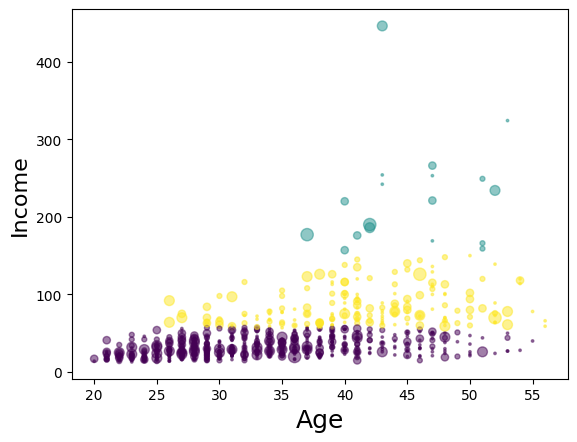

In [32]:
area = np.pi * ( XX[:, 1])**2
plt.scatter(XX[:, 0], XX[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

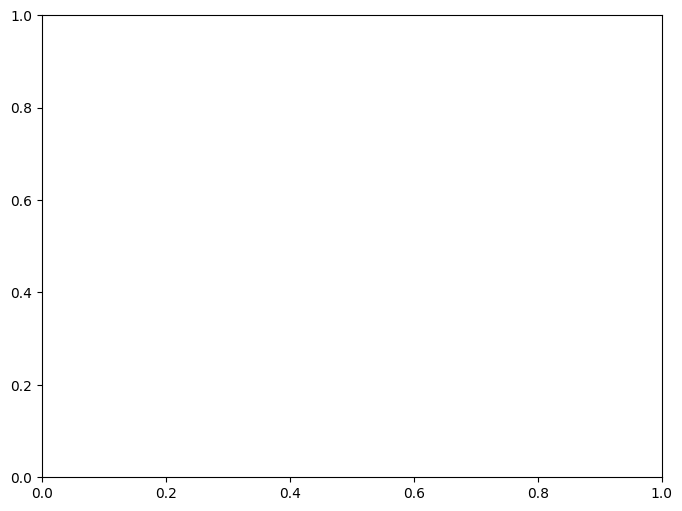

In [38]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education', fontsize=18)
ax.set_ylabel('Age', fontsize=16)
ax.set_zlabel('Income', fontsize=16)

ax.scatter(XX[:, 1], XX[:, 0], XX[:, 3], c= labels.astype(float))



k-means divisera vos clients en groupes mutuellement exclusifs, par exemple en 3 clusters. Les clients de chaque cluster sont similaires sur le plan démographique.
Nous pouvons désormais créer un profil pour chaque groupe, en tenant compte des caractéristiques communes de chaque cluster.
Par exemple, les 3 clusters peuvent être :

* AFFLUENTS, ÉDUQUÉS ET ÂGÉS
* MOYEN D'ÂGE ET REVENU MOYEN
* JEUNE ET FAIBLE REVENU